In [1]:
#The functions you have to work on are written as graded, do not change other functions
import numpy as np
from sklearn.linear_model import LinearRegression
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


In [2]:
#NON-GRADED
X = np.arange(0,5,0.0001, dtype=np.float32)
delta = np.random.uniform(-1,1, size=X.shape[0])
Y = .4 * X + 3 + delta

#making a copy for later use
rx = X
ry = Y
print (len(X))

50000


Text(0, 0.5, 'Y')

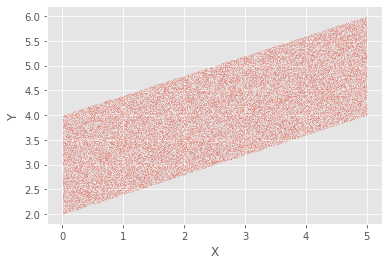

In [3]:
#NON-GRADED
plt.scatter(X,Y,s=0.01)
plt.xlabel('X')
plt.ylabel('Y')

$$
h(X, \theta) = X^T . \theta
$$

In [4]:
#GRADED
def hyp(X,theta):
    # Find the hypothesis when you receive 2 a matrix X and a vector theta, 
    #return the result as mentioned in the equation above.
    #TransposeOfX=np.transpose(X)
    Hypothesis=np.dot(X,theta)
    return Hypothesis

$$
cost = \frac{1}{2m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)}^2
$$

In [5]:
#GRADED
def cost_function(theta,X,Y):
    
    # Find the cost function by using the above given equations 
    return np.sum(np.square(hyp(X,theta)-Y))/(2*X.shape[0])

$$
\frac{\delta}{\delta \theta_j} = \frac{1}{m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)} * X_j
$$

In [6]:
#GRADED
def derivative_cost_function(theta,X,Y,alpha):
    return np.sum(np.dot((hyp(X,theta)-Y),X))/X.shape[0]
    # Find the new derivatives (theta) by using the above given equation and return the theta 

In [7]:
#DO NOT CHANGE
print (X.shape)
nx=np.hstack((X,ones(len(X),)))
nx=nx.reshape((2,X.shape[0])).T
print (nx.shape)

(50000,)
(50000, 2)


In [8]:
#DO NOT CHANGE
np.random.seed(20) # To make sure you have the same value as me
eps=0.0001
nexamples=float(nx.shape[0])
thetas=np.random.rand(nx.shape[1],)
print (thetas)

[0.5881308  0.89771373]


In [9]:
#DO NOT CHANGE
cf=cost_function(thetas,nx,Y)
print (cf)

1.5333956869645242


In [10]:
#DO NOT CHANGE
ad=derivative_cost_function(thetas,nx,Y,0.01)
print (ad)

-5.3200872416806195


In [11]:
#GRADED
def GradientDescent(X,Y,thetas,cost_function,derivative_cost_function,maxniter=20000):
    """
    Write the gradient descent method in following order
    Find cost using the above function that you will build
    
    Find the new derivatives.
    
    If the cost is decreasing, continue the work, else break it
    
    """
    for i in range(maxniter):
        cost=cost_function(thetas,X,Y)
        dz = derivative_cost_function(thetas,X,Y,alpha=0.001)
        if dz>-0.0001 and dz<0.0001:
            break 
        print("Iteration: {}, cost = {}, derivative = {}".format(i,cost,dz))
        thetas = thetas - dz*0.001
    return thetas

In [12]:
#DO NOT CHANGE
theta_new=GradientDescent(nx,Y,thetas,cost_function,derivative_cost_function) 
print(theta_new)

Iteration: 0, cost = 1.5333956869645242, derivative = -5.3200872416806195
Iteration: 1, cost = 1.5052951942638173, derivative = -5.243834522816432
Iteration: 2, cost = 1.4779944565117886, derivative = -5.16867473285924
Iteration: 3, cost = 1.4514707122577843, derivative = -5.094592206877832
Iteration: 4, cost = 1.4257018478541283, derivative = -5.021571504466188
Iteration: 5, cost = 1.4006663790193015, derivative = -4.949597406525362
Iteration: 6, cost = 1.37634343292585, derivative = -4.878654912091477
Iteration: 7, cost = 1.3527127307980769, derivative = -4.8087292352092295
Iteration: 8, cost = 1.3297545710050134, derivative = -4.739805801850158
Iteration: 9, cost = 1.3074498126345722, derivative = -4.67187024687509
Iteration: 10, cost = 1.285779859535192, derivative = -4.604908411040152
Iteration: 11, cost = 1.2647266448116632, derivative = -4.538906338045677
Iteration: 12, cost = 1.2442726157622088, derivative = -4.473850271627387
Iteration: 13, cost = 1.2244007192442703, derivativ

Iteration: 434, cost = 0.5460497023152676, derivative = -0.010111977232679056
Iteration: 435, cost = 0.5460496007959728, derivative = -0.009967042437054915
Iteration: 436, cost = 0.5460495021659709, derivative = -0.009824184989357674
Iteration: 437, cost = 0.5460494063430313, derivative = -0.009683375115001835
Iteration: 438, cost = 0.5460493132472636, derivative = -0.009544583466151745
Iteration: 439, cost = 0.5460492228010505, derivative = -0.009407781115615072
Iteration: 440, cost = 0.546049134928985, derivative = -0.009272939550815281
Iteration: 441, cost = 0.5460490495578051, derivative = -0.009140030667840329
Iteration: 442, cost = 0.5460489666163343, derivative = -0.00900902676559941
Iteration: 443, cost = 0.5460488860354218, derivative = -0.00887990054003334
Iteration: 444, cost = 0.5460488077478851, derivative = -0.008752625078437267
Iteration: 445, cost = 0.5460487316884529, derivative = -0.008627173853840577
Iteration: 446, cost = 0.5460486577937128, derivative = -0.00850352

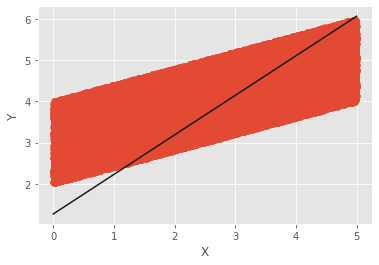

In [13]:
#DO NOT CHANGE
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(nx[:,0],np.dot(nx,theta_new),c='0.1')